In [1]:
import pandas as pd
import numpy as np
import smote_variants as sv
from potnet import *

2025-04-25 12:17:00.698708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745608620.720002   51764 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745608620.726629   51764 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745608620.743095   51764 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745608620.743116   51764 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745608620.743119   51764 computation_placer.cc:177] computation placer alr

In [ ]:
df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')
df.downloads_category.value_counts()    

downloads_category
Very Low    867608
Low         271614
Mid          37247
High         15166
Name: count, dtype: int64

In [14]:
df_high = df[df.downloads_category == 'High']
df_low = df[df.downloads_category == 'Low']
df_mid = df[df.downloads_category == 'Mid']
df_high.to_csv('data/high_downloads.csv', index=False)
df_low.to_csv('data/low_downloads.csv', index=False)
df_mid.to_csv('data/mid_downloads.csv', index=False)

In [8]:
num_samples = 100000
gen_data = hf_potnet_model_v3.generate(num_samples)

In [9]:
gen_data

,task_group,author_category,language_category,downloads_category,location
0,Text Processing,Silver,High,Very high,us
1,Image Processing,Gold,High,Very high,us
2,Text Processing,Silver,High,Very high,us
3,Text Processing,Silver,High,Very high,us
4,Image Processing,Gold,High,Very high,us
...,...,...,...,...,...
99995,Image Processing,Gold,High,Very high,us
99996,Unknown,Gold,High,Very high,us
99997,Image Processing,Gold,High,Very high,us
99998,Text Processing,Gold,High,Very high,us


In [10]:
gen_data.task_group.value_counts()

task_group
Text Processing     72219
Unknown             17335
Image Processing    10446
Name: count, dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_distrib(df):
    print(df.downloads_category.value_counts())
    # Create a count plot
    plt.figure(figsize=(14, 8))
    sns.set_theme(style="whitegrid")

    # Create grouped bar chart
    ax = sns.countplot(
        x="task_group",
        hue="downloads_category",
        data=df,
        order=df['task_group'].value_counts().index,
        palette="viridis"
    )

    # Customize plot
    plt.title("Distribution of Download Categories Across Task Groups", fontsize=16, pad=20)
    plt.xlabel("Task Group", fontsize=12)
    plt.ylabel("Count of Models", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # Add percentage annotations
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3,
                f'{height/total:.1%}',
                ha="center", fontsize=9)

    plt.legend(title="Download Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

downloads_category
Very high    8271
Name: count, dtype: int64


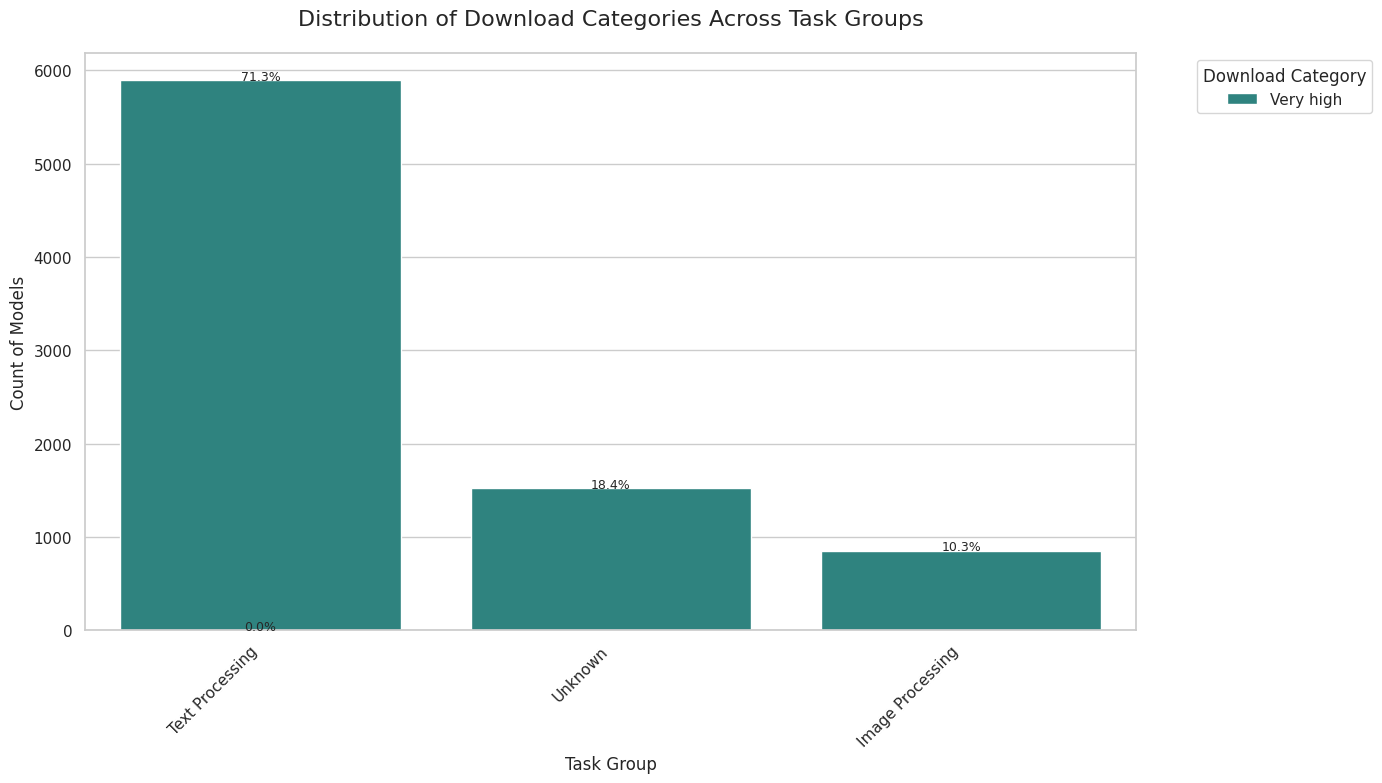

In [31]:
create_distrib(gen_data)

downloads_category
Very high    8271
Name: count, dtype: int64


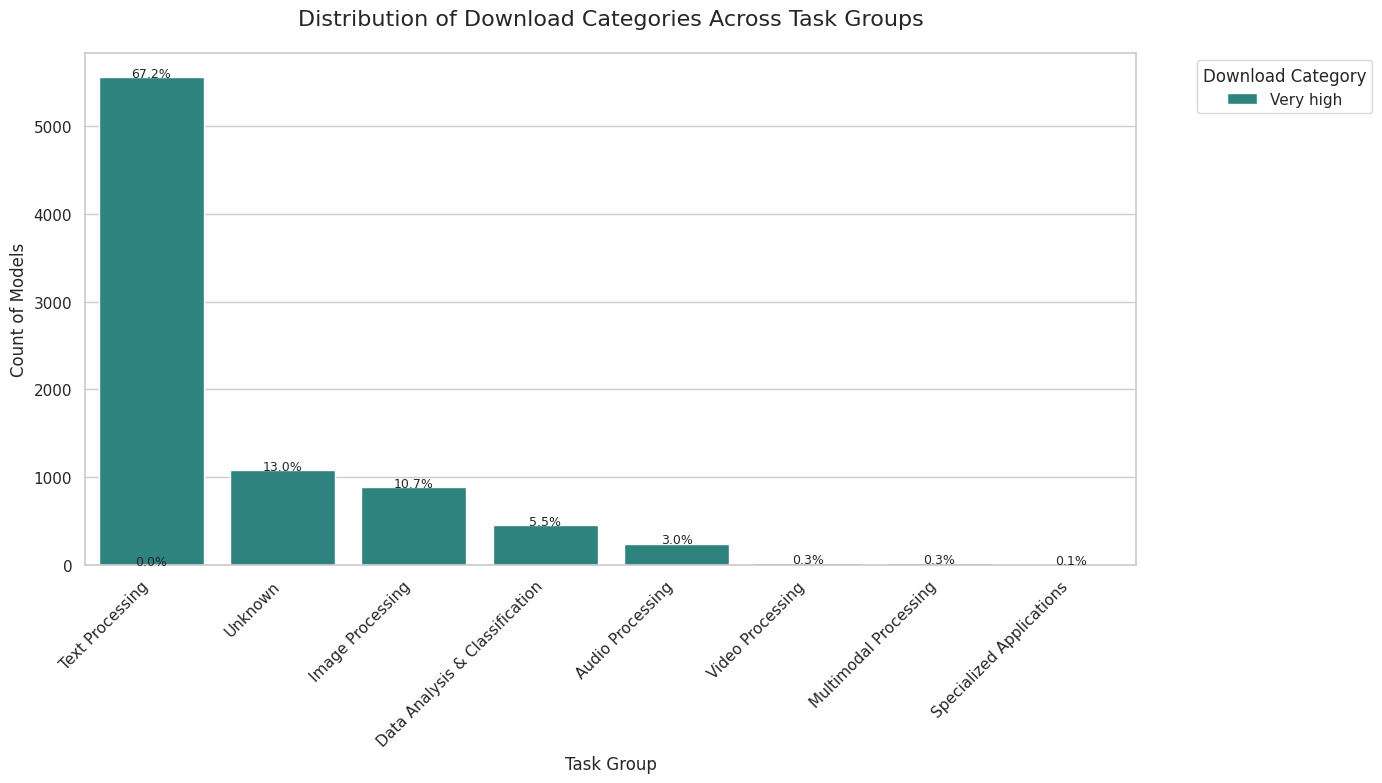

In [32]:
create_distrib(df)

In [35]:
import pandas as pd

def percent_distrib(df):
    categorical_columns = ['task_group', 'author_category', 'language_category', 'downloads_category', 'location']

    for col in categorical_columns:
        print(f"Percentage distribution for {col}:")
        percentages = df[col].value_counts(normalize=True) * 100
        print(percentages.round(2))
        print("\n")

In [36]:
percent_distrib(df)

Percentage distribution for task_group:
task_group
Text Processing                   67.20
Unknown                           13.02
Image Processing                  10.71
Data Analysis & Classification     5.48
Audio Processing                   2.95
Video Processing                   0.28
Multimodal Processing              0.27
Specialized Applications           0.10
Name: proportion, dtype: float64


Percentage distribution for author_category:
author_category
Gold      57.73
Silver    35.64
Bronze     6.63
Name: proportion, dtype: float64


Percentage distribution for language_category:
language_category
High        90.03
Moderate     7.73
Low          2.25
Name: proportion, dtype: float64


Percentage distribution for downloads_category:
downloads_category
Very high    100.0
Name: proportion, dtype: float64


Percentage distribution for location:
location
us    99.85
eu     0.15
Name: proportion, dtype: float64




In [37]:
percent_distrib(gen_data)

Percentage distribution for task_group:
task_group
Text Processing     71.26
Unknown             18.41
Image Processing    10.33
Name: proportion, dtype: float64


Percentage distribution for author_category:
author_category
Gold      60.25
Silver    36.55
Bronze     3.20
Name: proportion, dtype: float64


Percentage distribution for language_category:
language_category
High        91.38
Moderate     8.62
Name: proportion, dtype: float64


Percentage distribution for downloads_category:
downloads_category
Very high    100.0
Name: proportion, dtype: float64


Percentage distribution for location:
location
us    100.0
Name: proportion, dtype: float64




In [2]:
df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')
df.downloads_category.value_counts()

downloads_category
Very Low    867712
Low         271634
Mid          37247
High         15166
Name: count, dtype: int64

In [6]:
sv.queries.get_multiclass_oversamplers(n_quickest=20)

[smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_bus,
 smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_star,
 smote_variants.oversampling._rose.ROSE,
 smote_variants.oversampling._msmote.MSMOTE,
 smote_variants.oversampling._rwo_sampling.RWO_sampling,
 smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_mesh,
 smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_poly,
 smote_variants.oversampling._smote.SMOTE,
 smote_variants.oversampling._selected_smote.Selected_SMOTE,
 smote_variants.oversampling._nt_smote.NT_SMOTE,
 smote_variants.oversampling._g_smote.G_SMOTE,
 smote_variants.oversampling._random_smote.Random_SMOTE,
 smote_variants.oversampling._safe_level_smote.Safe_Level_SMOTE,
 smote_variants.oversampling._gaussian_smote.Gaussian_SMOTE,
 smote_variants.oversampling._mct.MCT,
 smote_variants.oversampling._borderline_smote.Borderline_SMOTE1,
 smote_variants.oversampling._cure_smote.CURE_SMOTE,
 smote_variants.oversampling.

In [9]:
import ast
df['tags'] = df['tags'].apply(ast.literal_eval)
df['location'] = df['tags'].apply(
    lambda tags: next((tag.split(':', 1)[1] for tag in tags if tag.startswith('region:')), None)
)

In [ ]:
target = 'downloads_category'
features = ['task_group', 'author_category', 'language_category', 'location']

X, y= df[features], df[target]
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=features, drop_first=True)
# Check the distribution of the target variable
print(y.value_counts())

oversampler= sv.MulticlassOversampling(oversampler='distant',
                                      oversampler_params={'random_state': 5})

# X_samp and y_samp contain the oversampled dataset
X_samp, y_samp= oversampler.sample(X, y)

2025-04-02 14:06:32,091:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive


downloads_category
Very Low    867712
Low         271634
Mid          37247
High         15166
Name: count, dtype: int64


2025-04-02 14:06:33,142:INFO:MulticlassOversampling: Sampling minority class with label: Low
2025-04-02 14:06:33,332:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE_bus'}")
2025-04-02 14:06:33,386:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE'}")
2025-04-02 14:06:34,757:INFO:MulticlassOversampling: Sampling minority class with label: Mid
2025-04-02 14:06:34,986:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.48903323976240404, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE_bus'}")
2025-04-02 14:06:35,066:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.48903323976240404, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE'}")
2025-04-02

In [5]:
np.unique(y_samp, return_counts=True)

(array(['High', 'Low', 'Mid', 'Very Low'], dtype=object),
 array([849241, 814900, 856659, 867712]))

In [6]:
oversampler = sv.polynom_fit_SMOTE_bus()
oversampler.sample(X,y)

2025-04-02 14:08:53,205:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2025-04-02 14:08:54,130:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.83333333, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.88888889, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.94444444, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array(['Very Low', 'Very Low', 'Very Low', ..., 'High', 'High', 'High'],
       dtype=object))

In [7]:
np.unique(y_samp, return_counts=True)

(array(['High', 'Low', 'Mid', 'Very Low'], dtype=object),
 array([849241, 814900, 856659, 867712]))

In [3]:
df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')[['downloads_category', 'task_group', 'author_category', 'language_category', 'location']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191759 entries, 0 to 1191758
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   downloads_category  1191759 non-null  object
 1   task_group          1191759 non-null  object
 2   author_category     1191759 non-null  object
 3   language_category   1191759 non-null  object
 4   location            1191759 non-null  object
dtypes: object(5)
memory usage: 45.5+ MB


In [4]:
df.downloads_category.value_counts()

downloads_category
Very Low    867712
Low         271634
Mid          37247
High         15166
Name: count, dtype: int64

In [5]:
sub_df = df[df.downloads_category.isin(['Very Low', 'Low'])].copy()
sub_df.downloads_category.value_counts()

downloads_category
Very Low    867712
Low         271634
Name: count, dtype: int64

In [ ]:
oversampler = sv.kmeans_SMOTE()
features = ['task_group', 'author_category', 'language_category', 'location']
target = 'downloads_category'

from sklearn.preprocessing import LabelEncoder
def preprocess_data(df, features, target):
    """
    Preprocess the data:
     - One-hot encode the features to get numeric columns.
     - Label encode the target if necessary.
     - Return processed X and y.
    """
    # One-hot encode the predictor columns
    X = pd.get_dummies(df[features], drop_first=True)
    
    # Label encode the target column if it's not numeric
    if df[target].dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(df[target])
    else:
        y = df[target].values

    return X, y

X, y = preprocess_data(sub_df, features, target)

# Ensure that X and y are numpy arrays, as some oversamplers require this format
X_array = X.to_numpy()
y_array = np.array(y)

# Perform oversampling
X_samp, y_samp = oversampler.sample(X_array.astype(int), y_array)

# Convert the oversampled data back to a DataFrame for consistency
X_samp = pd.DataFrame(X_samp, columns=X.columns)


2025-04-17 21:14:37,181:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'kmeans_SMOTE'}")


In [10]:
sv.queries.get_multiclass_oversamplers()

[smote_variants.oversampling._a_suwo.A_SUWO,
 smote_variants.oversampling._adasyn.ADASYN,
 smote_variants.oversampling._adg.ADG,
 smote_variants.oversampling._and_smote.AND_SMOTE,
 smote_variants.oversampling._ans.ANS,
 smote_variants.oversampling._asmobd.ASMOBD,
 smote_variants.oversampling._assembled_smote.Assembled_SMOTE,
 smote_variants.oversampling._borderline_smote.Borderline_SMOTE1,
 smote_variants.oversampling._borderline_smote.Borderline_SMOTE2,
 smote_variants.oversampling._cbso.CBSO,
 smote_variants.oversampling._ccr.CCR,
 smote_variants.oversampling._ce_smote.CE_SMOTE,
 smote_variants.oversampling._cluster_smote.cluster_SMOTE,
 smote_variants.oversampling._cure_smote.CURE_SMOTE,
 smote_variants.oversampling._dbsmote.DBSMOTE,
 smote_variants.oversampling._deago.DEAGO,
 smote_variants.oversampling._distance_smote.distance_SMOTE,
 smote_variants.oversampling._dsrbf.DSRBF,
 smote_variants.oversampling._edge_det_smote.Edge_Det_SMOTE,
 smote_variants.oversampling._g_smote.G_SMOTE

In [3]:
import smote_variants as sv
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')[['task_group', 'author_category', 'language_category', 'location', 'downloads_category']]
# for testing Very Low and Low
df = df[df.downloads_category.isin(['Very Low', 'High'])].copy()

print(df.downloads_category.value_counts())

target = 'downloads_category'
features = ['task_group', 'author_category', 'language_category', 'location']

def preprocess_data(df, features, target):
    """
    Preprocess the data:
     - One-hot encode the features to get numeric columns.
     - Label encode the target if necessary.
     - Return processed X and y.
    """
    # One-hot encode the predictor columns
    X = pd.get_dummies(df[features], drop_first=True)
    
    # Label encode the target column if it's not numeric
    if df[target].dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(df[target])
    else:
        y = df[target].values

    return X, y



downloads_category
Very Low    867712
High         15166
Name: count, dtype: int64


In [22]:
X, y = preprocess_data(df, features, target)
X = X.astype(float)
X = X.values

oversampler = sv.kmeans_SMOTE(random_state=42, n_clusters=21, n_neighbors=5)
mc = sv.MulticlassOversampling(
    oversampler='kmeans_SMOTE',
    oversampler_params={'n_clusters': 2, 'n_neighbors': 5, 'random_state': 42}
)

In [23]:
X_samp, y_samp = oversampler.sample(X, y)
print(np.unique(y_samp, return_counts=True))

2025-04-23 15:48:35,726:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clusters': 21, 'irt': 2.0, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 42, 'class_name': 'kmeans_SMOTE'}")
2025-04-23 15:48:37,509:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2025-04-23 15:48:37,512:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2025-04-23 15:48:37,554:INFO:kmeans_SMOTE: simplex sampling with n_dim 2


(array([0, 1]), array([867712, 867712]))


In [3]:
df_old = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')[['task_group', 'author_category', 'language_category', 'location', 'downloads_category']]
df = pd.read_csv('utils/kmeans_smote_balanced.csv')
df_high = pd.read_csv('utils/kmeans_smote_High.csv')
df_old.name = "Original Dataset"
df.name = "KMeans SMOTE final dataset"
df_high.name = "KMeans SMOTE Very Low vs High"
df_Mid = pd.read_csv('utils/kmeans_smote_Mid.csv')
df_Mid.name = "KMeans SMOTE Mid vs High"

In [4]:
def fix_values(df):
    for col in ('task_group','author_category','language_category'):
        # remove everything from the start of the string up through the first underscore
        df[col] = df[col].str.replace(r'^[^_]*_', '', regex=True)
    return df

df_high = fix_values(df_high)
df = fix_values(df)
df_Mid = fix_values(df_Mid)

In [5]:
print(df.downloads_category.value_counts())
print(df_high.downloads_category.value_counts())
print(df_old.downloads_category.value_counts())

downloads_category
Very Low    2603136
Low          867712
Mid          867712
High         867712
Name: count, dtype: int64
downloads_category
Very Low    867712
High        867712
Name: count, dtype: int64
downloads_category
Very Low    867608
Low         271614
Mid          37247
High         15166
Name: count, dtype: int64


In [6]:
df_old.head(10)

,task_group,author_category,language_category,location,downloads_category
0,Text Processing,Bronze,High,us,Very Low
1,Unknown,Bronze,High,us,Very Low
2,Unknown,Bronze,High,us,Very Low
3,Unknown,Silver,High,us,Very Low
4,Unknown,Silver,High,us,Very Low
5,Text Processing,Silver,High,us,Very Low
6,Text Processing,Silver,High,us,Very Low
7,Text Processing,Silver,High,us,Very Low
8,Text Processing,Silver,High,us,Very Low
9,Text Processing,Silver,High,us,Very Low


In [7]:
df_high.head(10)

,task_group,author_category,language_category,location,downloads_category
0,Text Processing,Bronze,High,us,Very Low
1,Unknown,Bronze,High,us,Very Low
2,Unknown,Bronze,High,us,Very Low
3,Unknown,Silver,High,us,Very Low
4,Unknown,Silver,High,us,Very Low
5,Text Processing,Silver,High,us,Very Low
6,Text Processing,Silver,High,us,Very Low
7,Text Processing,Silver,High,us,Very Low
8,Text Processing,Silver,High,us,Very Low
9,Text Processing,Silver,High,us,Very Low


In [8]:

def compare_dfs(df_old, df_high):
  print("="*40)
  print(f"Comparing DataFrames: {df_old.name} vs {df_high.name}")
  print("="*40)
  old_vl  = df_old [df_old .downloads_category=='Very Low'].copy()
  high_vl = df_high[df_high.downloads_category=='Very Low'].copy()

  # quick sanity check
  print("Counts:", old_vl.shape[0], "vs", high_vl.shape[0])

  # define the features you want to compare
  keys = ['task_group','author_category','language_category','location']

  # sort each block and reset index
  old_sorted  = old_vl [keys].sort_values(by=keys).reset_index(drop=True)
  high_sorted = high_vl[keys].sort_values(by=keys).reset_index(drop=True)

  # 1) Boolean test: are they exactly the same?
  print("Exact match?", old_sorted.equals(high_sorted))

  # 2) If not, show you the mismatches:
  diff = (
      pd.concat([old_sorted, high_sorted])
        .drop_duplicates(keep=False)
  )
  print("Number of differing rows:", len(diff))
  if not diff.empty:
      print(diff.head())

compare_dfs(df_old, df_high)
compare_dfs(df_old, df)
compare_dfs(df_high, df)


Comparing DataFrames: Original Dataset vs KMeans SMOTE Very Low vs High
Counts: 867608 vs 867712
Exact match? False
Number of differing rows: 0
Comparing DataFrames: Original Dataset vs KMeans SMOTE final dataset
Counts: 867608 vs 2603136
Exact match? False
Number of differing rows: 0
Comparing DataFrames: KMeans SMOTE Very Low vs High vs KMeans SMOTE final dataset
Counts: 867712 vs 2603136
Exact match? False
Number of differing rows: 0


In [9]:
compare_dfs(df_high, df_Mid)

Comparing DataFrames: KMeans SMOTE Very Low vs High vs KMeans SMOTE Mid vs High
Counts: 867712 vs 867712
Exact match? True
Number of differing rows: 0


In [10]:
import pandas as pd

kmeans_smote_Low = pd.read_csv('utils/kmeans_smote_Low.csv')
kmeans_smote_High = pd.read_csv('utils/kmeans_smote_High.csv')
kmeans_smote_Mid = pd.read_csv('utils/kmeans_smote_Mid.csv')

kmeans_smote_Low = fix_values(kmeans_smote_Low)
kmeans_smote_High = fix_values(kmeans_smote_High)
kmeans_smote_Mid = fix_values(kmeans_smote_Mid)

# 1) grab one copy of the Very Low rows
df_vl = kmeans_smote_Low.loc[
    kmeans_smote_Low['downloads_category'] == 'Very Low'
].copy()

# 2) grab the other classes
df_low  = kmeans_smote_Low.loc[ kmeans_smote_Low['downloads_category'] == 'Low' ]
df_mid  = kmeans_smote_Mid.loc[ kmeans_smote_Mid['downloads_category'] == 'Mid' ]
df_high = kmeans_smote_High.loc[kmeans_smote_High['downloads_category'] == 'High']

# 3) concatenate
balanced_df = pd.concat([df_vl, df_low, df_mid, df_high], ignore_index=True)

# verify
print(balanced_df['downloads_category'].value_counts())


downloads_category
Very Low    867712
Low         867712
Mid         867712
High        867712
Name: count, dtype: int64


In [11]:
balanced_df.head(10)

,task_group,author_category,language_category,location,downloads_category
0,Text Processing,Bronze,High,us,Very Low
1,Unknown,Bronze,High,us,Very Low
2,Unknown,Bronze,High,us,Very Low
3,Unknown,Silver,High,us,Very Low
4,Unknown,Silver,High,us,Very Low
5,Text Processing,Silver,High,us,Very Low
6,Text Processing,Silver,High,us,Very Low
7,Text Processing,Silver,High,us,Very Low
8,Text Processing,Silver,High,us,Very Low
9,Text Processing,Silver,High,us,Very Low


downloads_category
Very Low    867712
Low         867712
Mid         867712
High        867712
Name: count, dtype: int64


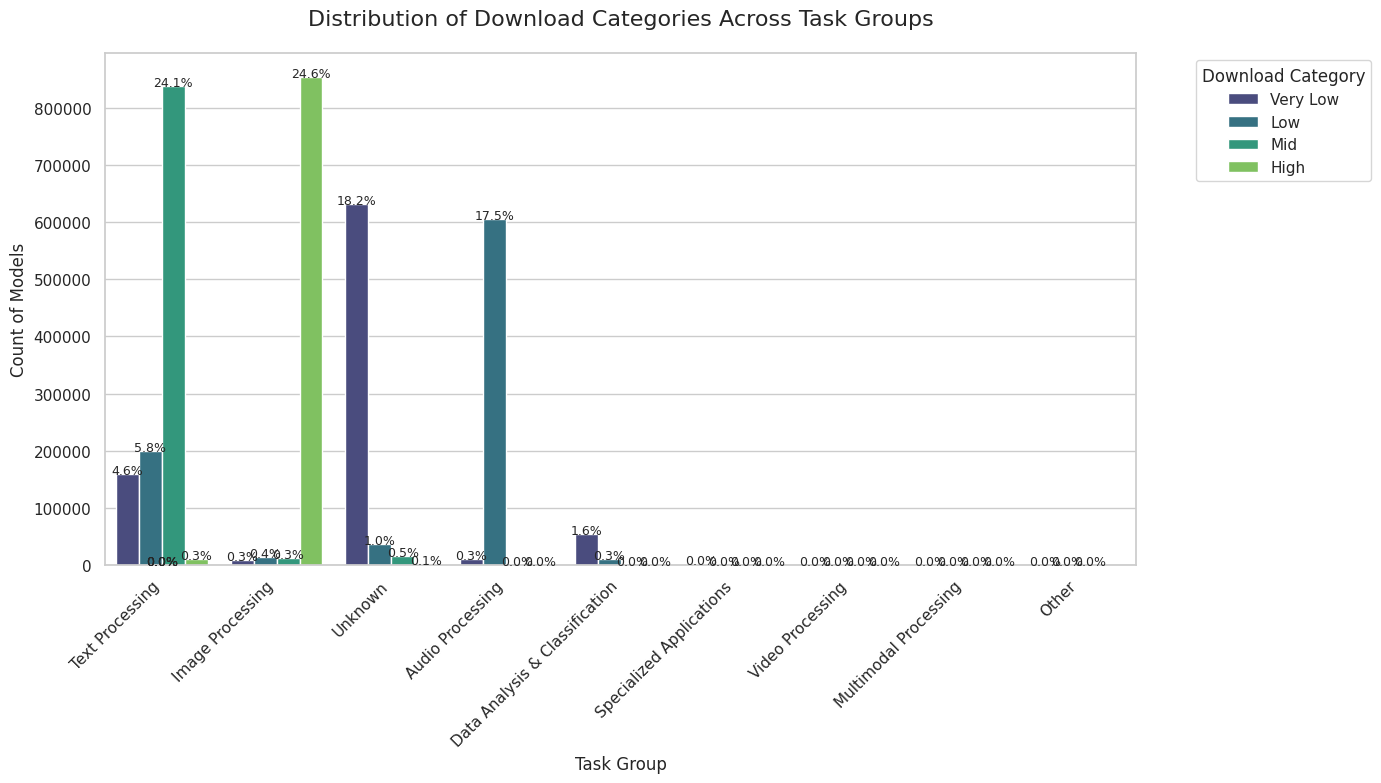

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_distrib(df):
    print(df.downloads_category.value_counts())
    # Create a count plot
    plt.figure(figsize=(14, 8))
    sns.set_theme(style="whitegrid")

    # Create grouped bar chart
    ax = sns.countplot(
        x="task_group",
        hue="downloads_category",
        data=df,
        order=df['task_group'].value_counts().index,
        palette="viridis"
    )

    # Customize plot
    plt.title("Distribution of Download Categories Across Task Groups", fontsize=16, pad=20)
    plt.xlabel("Task Group", fontsize=12)
    plt.ylabel("Count of Models", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # Add percentage annotations
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3,
                f'{height/total:.1%}',
                ha="center", fontsize=9)

    plt.legend(title="Download Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

create_distrib(balanced_df) 

In [12]:
balanced_df.to_csv('utils/kmeans_smote_balanced.csv', index=False)

In [3]:
df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')
df.duplicated().sum()

124

In [17]:
df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')


In [18]:
df.duplicated().sum()

0

In [19]:
features = ['task_group', 'author_category', 'language_category', 'location', 'downloads_category']
new_df = df[features].copy()
new_df.duplicated().sum()

1191386

In [20]:
new_df

,task_group,author_category,language_category,location,downloads_category
0,Text Processing,Bronze,High,us,Very Low
1,Unknown,Bronze,High,us,Very Low
2,Unknown,Bronze,High,us,Very Low
3,Unknown,Silver,High,us,Very Low
4,Unknown,Silver,High,us,Very Low
...,...,...,...,...,...
1191630,Unknown,Bronze,High,us,Very Low
1191631,Text Processing,Bronze,High,us,Very Low
1191632,Unknown,Bronze,High,us,Very Low
1191633,Unknown,Bronze,High,us,Very Low


In [21]:
new_df = new_df.drop_duplicates()

In [22]:
new_df

,task_group,author_category,language_category,location,downloads_category
0,Text Processing,Bronze,High,us,Very Low
1,Unknown,Bronze,High,us,Very Low
3,Unknown,Silver,High,us,Very Low
5,Text Processing,Silver,High,us,Very Low
10,Text Processing,Bronze,High,us,Low
...,...,...,...,...,...
951027,Text Processing,Gold,High,eu,Mid
954548,Audio Processing,Gold,High,eu,Mid
1059925,Unknown,Bronze,Low,us,High
1101900,Specialized Applications,Bronze,Low,us,Low


In [2]:
from utils.helpers import train_and_evaluate_model_different_dfs

potnet_training_df = pd.read_csv('data/generated_data/hf_11_24_balanced.csv')
smote_training_df = pd.read_csv('utils/kmeans_smote_balanced.csv')
testing_df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')
print(testing_df.downloads_category.value_counts())
print(smote_training_df.downloads_category.value_counts())
print(potnet_training_df.downloads_category.value_counts())

downloads_category
Very Low    867608
Low         271614
Mid          37247
High         15166
Name: count, dtype: int64
downloads_category
Very Low    867712
Low         867712
Mid         867712
High        867712
Name: count, dtype: int64
downloads_category
Low         271634
High        271634
Mid         271634
Very Low    271629
Name: count, dtype: int64


In [8]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191635 entries, 0 to 1191634
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   model_id             1191635 non-null  object
 1   num_downloads        1191635 non-null  int64 
 2   num_likes            1191635 non-null  int64 
 3   is_private           1191635 non-null  bool  
 4   task                 1191635 non-null  object
 5   tags                 1191635 non-null  object
 6   author               1191635 non-null  object
 7   author_category      1191635 non-null  object
 8   base_model_relation  322 non-null      object
 9   base_model           269143 non-null   object
 10  language             1191635 non-null  object
 11  model_creator        6528 non-null     object
 12  model_type           4578 non-null     object
 13  model_name           6433 non-null     object
 14  model_card_tags      376704 non-null   object
 15  datasets       

In [3]:
features = ['task_group', 'author_category', 'language_category', 'location']
target = 'downloads_category'

In [4]:
train_and_evaluate_model_different_dfs(potnet_training_df, testing_df, features, target, "logistic")

Accuracy: 0.1707
Precision: 0.1707
Recall: 0.1707
Micro Average F1 Score: 0.1707
Macro Average F1 Score: 0.1823
Training Time: 19.22 seconds
Testing Time: 0.94 seconds


In [5]:
train_and_evaluate_model_different_dfs(potnet_training_df, testing_df, features, target, "random_forest")

Accuracy: 0.4530
Precision: 0.4530
Recall: 0.4530
Micro Average F1 Score: 0.4530
Macro Average F1 Score: 0.3079
Training Time: 77.80 seconds
Testing Time: 5.80 seconds


In [6]:
train_and_evaluate_model_different_dfs(smote_training_df, testing_df, features, target, "logistic")

Accuracy: 0.7457
Precision: 0.7457
Recall: 0.7457
Micro Average F1 Score: 0.7457
Macro Average F1 Score: 0.4020
Training Time: 27.03 seconds
Testing Time: 0.94 seconds


In [7]:
train_and_evaluate_model_different_dfs(smote_training_df, testing_df, features, target, "random_forest")

Accuracy: 0.7510
Precision: 0.7510
Recall: 0.7510
Micro Average F1 Score: 0.7510
Macro Average F1 Score: 0.4123
Training Time: 193.58 seconds
Testing Time: 5.70 seconds
